## INTELEVO Networks Customer Churn- Perdictive Analysis using Random Forest Classifier

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Extraction

In [2]:
# Defining the file path to the Excel File
file_path = r"C:\Users\hp\Desktop\Projects\Telecom Customer Churn Data\Production_Data.xlsx"

# Defining the sheet name to read data from
sheet_name = 'vw_ChurnData'

In [3]:
# Reading the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name = sheet_name)

# Displaying the fist few rows of the dataset
print(data.head())

  Customer_ID  Gender  Age Married           City  Number_of_Referrals  \
0   11098-CHA  Female   30     Yes  Charlottetown                    0   
1   11114-SUR    Male   51      No         Surrey                    5   
2   11167-MON  Female   43     Yes       Montreal                    3   
3   11179-TOR    Male   35      No        Toronto                   10   
4   11180-CAL    Male   75     Yes        Calgary                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1    Yes                    No  ...   
1                 9     Deal 5    Yes                    No  ...   
2                28     Deal 1    Yes                   Yes  ...   
3                12        NaN    Yes                    No  ...   
4                27     Deal 2    Yes                    No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Withdraw

### Data Processing and Preparation

In [4]:
# Removing the columns that will not be used for the prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis = 1)

In [5]:
# Listing the columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'City', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method']

In [6]:
# Converting the columns encoding categorical variables to numerical values
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [7]:
# Manually encoding the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [8]:
# Splitting data into features and target (independent and dependent variables)
x = data.drop('Customer_Status', axis = 1)
y = data['Customer_Status']

In [9]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Training the Random Forest Model

In [10]:
# Initializing the Random Forest Classifier (Defining the decision trees in model)
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [11]:
# Training the model using the dataset
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Evaluating the Random Forest Model

In [12]:
# Making Predictions
y_pred = rf_model.predict(X_test)

In [13]:
# Evaluating the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassfication Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[782  67]
 [121 232]]

Classfication Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       849
           1       0.78      0.66      0.71       353

    accuracy                           0.84      1202
   macro avg       0.82      0.79      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [14]:
# Selecting the Feature Using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances) [::-1]

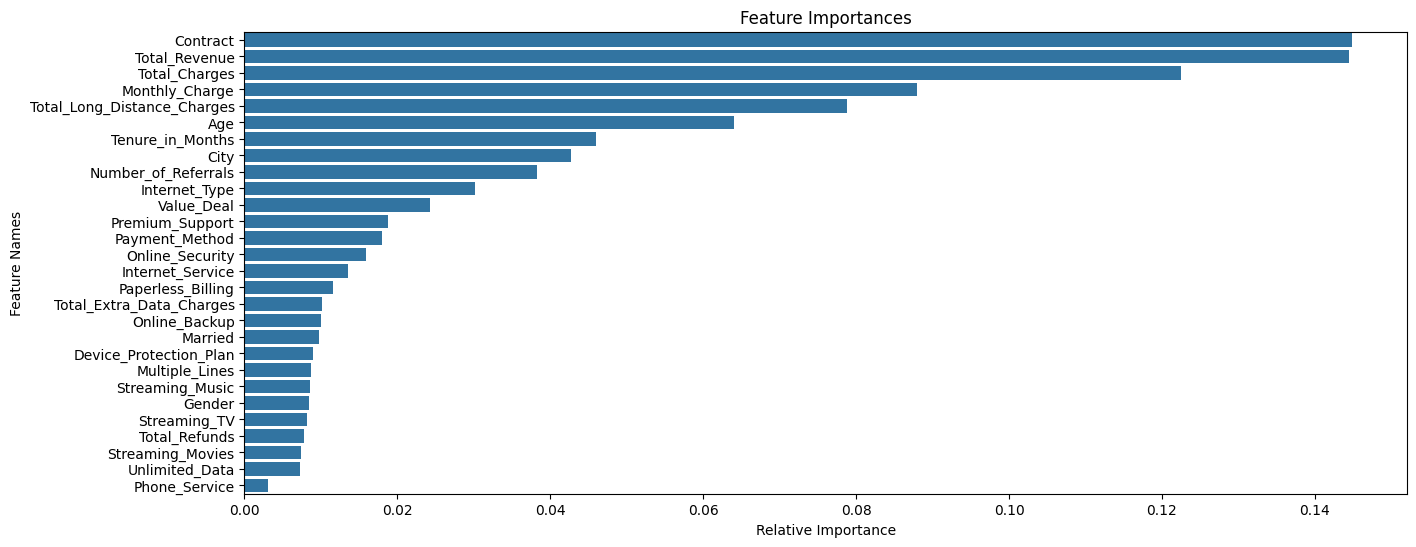

In [15]:
# Plotting the Feature Importance in Predictive Analysis
plt.figure(figsize = (15, 6))
sns.barplot(x = importances[indices], y = x.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

### Making Predictions Using New Data

In [16]:
# Defining the file path to the Joiner Data Excel File
file_path = r"C:\Users\hp\Desktop\Projects\Telecom Customer Churn Data\Production_Data.xlsx"

# Defining the sheet name to read data from
sheet_name = 'vw_JoinData'

In [17]:
# Reading the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name = sheet_name)

# Displaying the fist few rows of the dataset
print(new_data.head())

  Customer_ID  Gender  Age Married         City  Number_of_Referrals  \
0   11751-CAL  Female   18      No      Calgary                    5   
1   12056-MON    Male   27      No     Montreal                    2   
2   12136-HAL  Female   25     Yes      Halifax                    2   
3   12257-THU  Female   39      No  Thunder Bay                    9   
4   12340-OTT  Female   51     Yes       Ottawa                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5    No                     No  ...   
1                20        NaN    Yes                    No  ...   
2                35        NaN    Yes                    No  ...   
3                 1        NaN    Yes                    No  ...   
4                10        NaN    Yes                    No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4

In [18]:
# Retaining the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retaining the Customer_ID column
customer_ids = new_data['Customer_ID']

In [19]:
# Dropping the columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis = 1)

# Encoding categorical variables using the saved label Encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

In [20]:
# Making Predictions
new_predictions = rf_model.predict(new_data)

# Adding predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filtering the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [21]:
# Saving the results 
original_data.to_csv(r"C:\Users\hp\Desktop\Projects\Telecom Customer Churn Data\Churn_Predictions.csv")